## Введение в DS на УБ и МиРА (2022)
### Домашнее задание #5:  Ближайшие соседи
Дедлайн: 19 июня 2022 года, 23:59
Правила игры

Домашнее задание состоит из двух частей, которые оцениваются в 3 - 7 балла. Все пункты в пределах одной части имеют одинаковый вес.

Решения принимаются до 19 июня 2022 года, 23:59 МСК включительно. Работы, отправленные после дедлайна, не проверяются. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

Все решения нужно загрузить в личный репозиторий на GitHub Classroom.

Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

Плагиат не допускается. При обнаружении случаев списывания, 
0
 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.


 ---

В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`). Скачайте  Student_Behaviour.csv, содержащую информацию о студентов бакалавриата.


### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [258]:
import pandas as pd
df = pd.read_csv('Student_Behaviour.csv')
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

In [259]:
df.info()
# Пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CertificationCourses  235 non-null    object 
 1   Gender                235 non-null    object 
 2   Department            235 non-null    object 
 3   Height(CM)            235 non-null    float64
 4   Weight(KG)            235 non-null    float64
 5   10Mark                235 non-null    float64
 6   12Mark                235 non-null    float64
 7   CollegeMark           235 non-null    float64
 8   Hobbies               235 non-null    object 
 9   DailyStudingTime      235 non-null    object 
 10  PreferToStudyIn       235 non-null    object 
 11  SalaryExpectation     235 non-null    int64  
 12  LikeDegree            235 non-null    object 
 13  CareerBasedonDegree   235 non-null    object 
 14  GamesSpendingTime     235 non-null    object 
 15  TravellingTime        2

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

In [260]:
# Судя по формату данных этого столбика, нужно просто убрать процент в конце
df['CareerBasedonDegree'] = df['CareerBasedonDegree'].apply(lambda x: int(x[:-1]))
df['CareerBasedonDegree']

0      50
1      75
2      50
3      50
4      25
       ..
230    50
231    75
232    50
233    75
234    75
Name: CareerBasedonDegree, Length: 235, dtype: int64

**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

In [261]:
df.columns

df['DailyStudingTime'].unique()
df['DailyStudingTime'] = df['DailyStudingTime'].replace('More Than 4 hour', '4 - what')
df['DailyStudingTime'] = df['DailyStudingTime'].replace('0 - 30 minute', '0 - wha')
df['DailyStudingTime'] = df['DailyStudingTime'].replace('30 - 60 minute', '0.5 - ha')
df['DailyStudingTime'] = df['DailyStudingTime'].apply(lambda x: int(60*(float(x.split(' ')[0]))))

df['GamesSpendingTime'].unique()
df['GamesSpendingTime'] = df['GamesSpendingTime'].replace('1.30 - 2 hour', '90 - what')
df['GamesSpendingTime'] = df['GamesSpendingTime'].replace('1 - 1.30 hour', '60 - wha')
df['GamesSpendingTime'] = df['GamesSpendingTime'].replace('More than 2 hour', '120 - ha')
df['GamesSpendingTime'] = df['GamesSpendingTime'].apply(lambda x: int(x.split(' ')[0]))

df['TravellingTime '].unique()
df['TravellingTime '] = df['TravellingTime '].replace('more than 3 hour', '3 - what')
df['TravellingTime '] = df['TravellingTime '].replace('0 - 30 minutes', '0 - wha')
df['TravellingTime '] = df['TravellingTime '].replace('30 - 60 minutes', '0.5 - ha')
df['TravellingTime'] = df['TravellingTime '].apply(lambda x: int(60*(float(x.split(' ')[0]))))
df = df.drop('TravellingTime ', axis = 1)

df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,StressLevel,FinancialStatus,PartTimeJob?,TravellingTime
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0,Morning,40000,No,50,90,Bad,Bad,No,30
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30,Morning,15000,Yes,75,60,Bad,Bad,No,0
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,60,Anytime,13000,Yes,50,120,Awful,Bad,No,30
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,60,Anytime,1500000,No,50,90,Bad,good,No,0
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30,Morning,50000,Yes,25,90,Good,good,No,30


**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

In [262]:
# Очень сомневаюсь что рост и вес имеют хоть какую то зависимость с нашей целевой переменной (+ там бред какой то в признаке)
good_feats = ['10Mark', '12Mark', 'CollegeMark', 'DailyStudingTime', 
              'SalaryExpectation', 'CareerBasedonDegree', 'GamesSpendingTime', 'TravellingTime']

**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

In [263]:
df[good_feats].describe()
# Данные выглядят неплохо, за исключением большого максимума у SalaryExpectation

,10Mark,12Mark,CollegeMark,DailyStudingTime,SalaryExpectation,CareerBasedonDegree,GamesSpendingTime,TravellingTime
count,235.000000,235.000000,235.000000,235.000000,2.350000e+02,235.000000,235.000000,235.000000
mean,76.842128,68.780128,70.660553,57.829787,3.248168e+04,69.574468,49.731915,48.127660
std,13.050800,11.016533,15.727446,58.433730,1.113146e+05,21.178671,39.137611,45.276745
min,7.400000,45.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,70.000000,60.000000,60.000000,30.000000,1.500000e+04,50.000000,30.000000,30.000000
50%,80.000000,69.000000,70.000000,30.000000,2.000000e+04,75.000000,30.000000,30.000000
75%,86.250000,76.000000,80.000000,60.000000,2.500000e+04,75.000000,75.000000,60.000000
max,98.000000,94.000000,100.000000,240.000000,1.500000e+06,100.000000,120.000000,180.000000


**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

In [264]:
df['LikeDegree'].value_counts()/df.shape[0]
# Ну логично что ЦП распределена по Бернулли с p = 0.914894

Yes    0.914894
No     0.085106
Name: LikeDegree, dtype: float64

Ну логично что ЦП распределена по Бернулли с p = 0.914894. Имея такой сильный дисбаланс, мы можем использовать далеко не все метрики. Например accuracy может иметь 92% точности, но он скорее всего будет просто предсказывать Yes во всех случаях. Для дисбалансных классов существуют Recall и Precision которые учитывают цену ошибок, а F1 score позволяет их скомбинировать

**Задание 8.**  Переведите целевую переменную к численному формату.

In [265]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['LikeDegree'] = le.fit_transform(df['LikeDegree'])

### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [266]:
from sklearn.model_selection import train_test_split
X = df[good_feats]
y = df['LikeDegree']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333, stratify=df['LikeDegree'])

**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [267]:
# Скажем что все студенты довольны
y_pred_naive = [1 for _ in range(len(X_test))]

**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [268]:
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn7 = KNeighborsClassifier(n_neighbors = 7)

knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [269]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred_knn3 = knn3.predict(X_test)
y_pred_knn5 = knn5.predict(X_test)
y_pred_knn7 = knn7.predict(X_test)

print('Baseline:   Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_naive), precision_score(y_test, y_pred_naive), f1_score(y_test, y_pred_naive)))
print('3 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn3), precision_score(y_test, y_pred_knn3), f1_score(y_test, y_pred_knn3)))
print('5 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn5), precision_score(y_test, y_pred_knn5), f1_score(y_test, y_pred_knn5)))
print('7 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn7), precision_score(y_test, y_pred_knn7), f1_score(y_test, y_pred_knn7)))
# Судя по метрикам, модели имеют идентичную точность

Baseline:   Recall: 1.000, Precision: 0.915, F1: 0.956
3 ngbrs:    Recall: 1.000, Precision: 0.915, F1: 0.956
5 ngbrs:    Recall: 1.000, Precision: 0.915, F1: 0.956
7 ngbrs:    Recall: 1.000, Precision: 0.915, F1: 0.956


**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [270]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) 

X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

knn3.fit(X_train_norm, y_train)
knn5.fit(X_train_norm, y_train)
knn7.fit(X_train_norm, y_train)

y_pred_knn3 = knn3.predict(X_test_norm)
y_pred_knn5 = knn5.predict(X_test_norm)
y_pred_knn7 = knn7.predict(X_test_norm)

print('3 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn3), precision_score(y_test, y_pred_knn3), f1_score(y_test, y_pred_knn3)))
print('5 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn5), precision_score(y_test, y_pred_knn5), f1_score(y_test, y_pred_knn5)))
print('7 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn7), precision_score(y_test, y_pred_knn7), f1_score(y_test, y_pred_knn7)))

# Скалирование чуть изменило модель с 3 соседями, но по факту все осталось почти как прежде

3 ngbrs:    Recall: 0.985, Precision: 0.928, F1: 0.955
5 ngbrs:    Recall: 1.000, Precision: 0.915, F1: 0.956
7 ngbrs:    Recall: 1.000, Precision: 0.915, F1: 0.956


**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

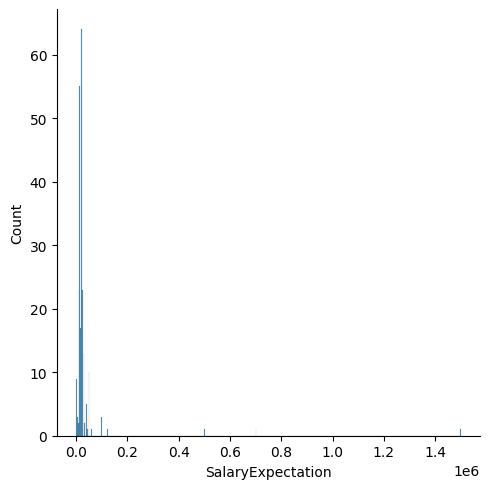

In [271]:
import seaborn as sns
sns.displot(df['SalaryExpectation'])

In [272]:
df = df[df['SalaryExpectation'] < 70000]

X = df[good_feats]
y = df['LikeDegree']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['LikeDegree'])

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn7 = KNeighborsClassifier(n_neighbors = 7)

knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn7.fit(X_train, y_train)

y_pred_knn3 = knn3.predict(X_test)
y_pred_knn5 = knn5.predict(X_test)
y_pred_knn7 = knn7.predict(X_test)

print('3 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn3), precision_score(y_test, y_pred_knn3), f1_score(y_test, y_pred_knn3)))
print('5 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn5), precision_score(y_test, y_pred_knn5), f1_score(y_test, y_pred_knn5)))
print('7 ngbrs:    Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}'.format(
    recall_score(y_test, y_pred_knn7), precision_score(y_test, y_pred_knn7), f1_score(y_test, y_pred_knn7)))

# Точность совсем чуть чуть упала из за того что, видимо, выброс определялся правильно

3 ngbrs:    Recall: 1.000, Precision: 0.913, F1: 0.955
5 ngbrs:    Recall: 1.000, Precision: 0.913, F1: 0.955
7 ngbrs:    Recall: 1.000, Precision: 0.913, F1: 0.955


**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

Абсолютно все модели имеют идентичную точность предсказываний. Это обусловлено тем что выборка очень маленькая, а так же тем ,что скорее всего есть в данных есть несколько 'исключений из правил' которые есть внутри кластеров и они портят точность алгоритма, вне зависимости от количества ближайших соседей. В этом случае логичнее всего просто использовать наивный прогноз, так как он дает прогноз за константу, его не нужно обучать, ему не нужны никакие библиотеки и никакие данные 